# Sample

In [1]:
import pandas as pd
import seaborn as sns 
def read_wandb_csv(loc):
    df = pd.read_csv(loc)
    df.param_config_id = df.param_config_id.astype('str')
    return df

In [55]:
df = read_wandb_csv("16_base_modded_sweep.csv")
df

,Name,Runtime,Notes,State,Tags,beta1,beta2,catch_dropout,early_stopping_patience,evaluation_steps,...,train_p_max,train_p_var,train_st1_loss,train_st1_p_max,train_st2_loss,train_st2_p_max,accuracy_mm,eval_loss_mm,eval_p_max_mm,eval_p_var_mm
0,16_modded_base_sweep_01_modded/run_44,1572,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.004575,0.995437,0.008518,0.992310,NaN,NaN,NaN,NaN
1,16_modded_base_sweep_01_modded/run_43,704,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.011043,0.989027,0.016709,0.983639,NaN,NaN,NaN,NaN
2,16_modded_base_sweep_01_modded/run_42,867,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.021117,0.988630,0.025776,0.985621,NaN,NaN,NaN,NaN
3,16_modded_base_sweep_01_modded/run_41,877,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.002476,0.997528,0.004003,0.996044,NaN,NaN,NaN,NaN
4,16_modded_base_sweep_01_modded/run_40,503,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.006797,0.993228,0.009856,0.990252,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,16_modded_base_sweep_00_modded/run_04,451,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.001729,0.998273,0.002485,0.997519,NaN,NaN,NaN,NaN
101,16_modded_base_sweep_00_modded/run_03,572,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.001064,0.998936,0.001985,0.998059,NaN,NaN,NaN,NaN
102,16_modded_base_sweep_00_modded/run_02,325,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.000561,0.999439,0.000852,0.999149,NaN,NaN,NaN,NaN
103,16_modded_base_sweep_00_modded/run_01,394,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.000802,0.999199,0.001087,0.998913,NaN,NaN,NaN,NaN


<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

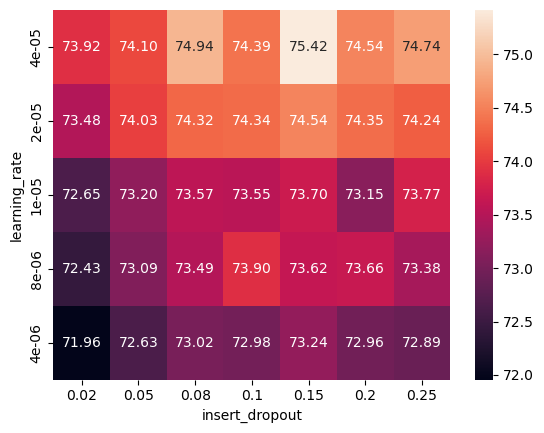

In [73]:
import seaborn as sns 
df_pivot = df.pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)

# GEN18 (64 samples, BASE) Sweep

In [2]:
loc = "18_sweep_64_base.csv"
df = read_wandb_csv(loc)
df

,Name,Runtime,Notes,Tags,ID,State,User,Group,Job Type,Created,...,eval_loss_mm,eval_p_max_mm,eval_p_var_mm,f1,matthews_correlation,pearson,spearmanr,train_loss,train_p_max,train_p_var
0,18_SWP2_ID_29_MOD,1471,-,"SWP2, modded",7mzl12zr,finished,ricu,NaN,NaN,2023-12-24T23:12:03.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18_SWP2_ID_28_MOD,1650,-,"SWP2, modded",t8tqcit0,finished,ricu,NaN,NaN,2023-12-24T22:44:12.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18_SWP2_ID_27_MOD,2155,-,"SWP2, modded",0f3rn711,finished,ricu,NaN,NaN,2023-12-24T22:07:58.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18_SWP2_ID_26_MOD,1104,-,"SWP2, modded",sodludkw,finished,ricu,NaN,NaN,2023-12-24T21:49:13.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18_SWP2_ID_25_MOD,2574,-,"SWP2, modded",kfdswzbt,finished,ricu,NaN,NaN,2023-12-24T21:05:58.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,18_SWP1_ID_000_VAN,362,-,"SWP1, vanilla",lrrkovcm,finished,ricu,NaN,NaN,2023-12-22T13:10:19.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,18_SWP0_ID_003_MOD,540,-,"SWP0, modded",q5kfyvai,finished,ricu,NaN,NaN,2023-12-22T13:07:29.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,18_SWP0_ID_002_MOD,971,-,"SWP0, modded",ri1ortqx,finished,ricu,NaN,NaN,2023-12-22T12:50:57.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,18_SWP0_ID_001_MOD,1033,-,"SWP0, modded",575rh73m,finished,ricu,NaN,NaN,2023-12-22T12:33:23.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

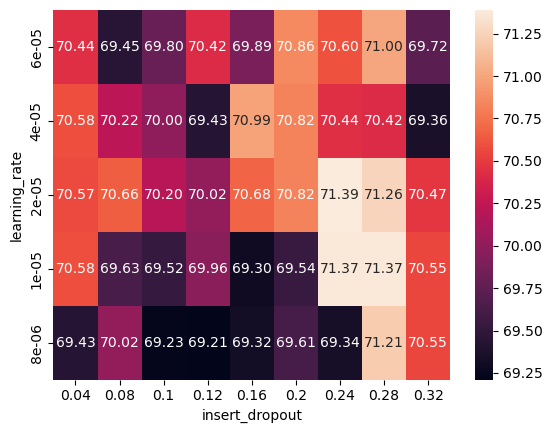

In [3]:
df_pivot = df.loc[df["catch_dropout"]==0,].pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)

<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

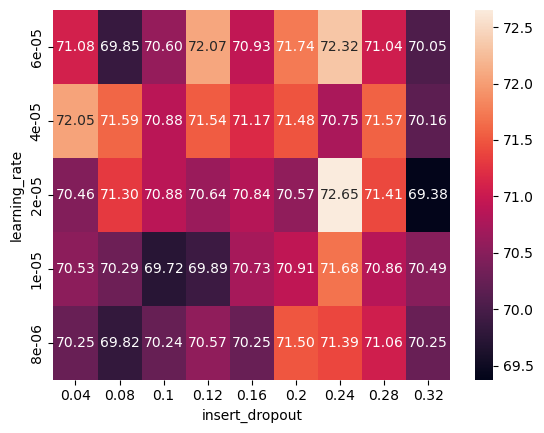

In [4]:
df_pivot = df.loc[df["catch_dropout"]!=0,].pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)